# Análise Exploratória

In [4]:
from utils import carrega_dataset
import seaborn as sns

sns.set_theme()
sns.set_theme("notebook")
sns.set(rc={"figure.figsize": [10, 6]})

dataset = carrega_dataset()


## Histograma de Yield

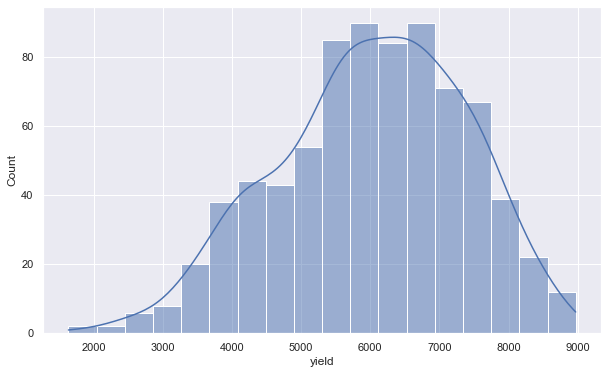

In [5]:
sns.histplot(data=dataset, x='yield', kde=True);

## Clonesize x Abelha Dominante x Temperatura Média x Yield

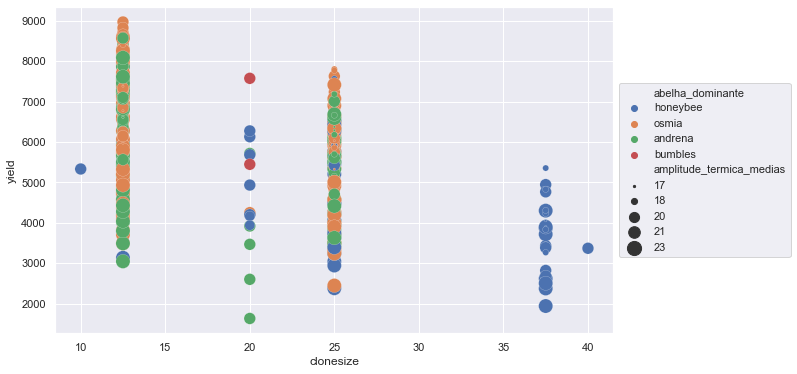

In [28]:
colunas_abelhas = ["honeybee", "bumbles", "andrena", "osmia"]
dataset["abelha_dominante"] = dataset[colunas_abelhas].idxmax(axis=1)

dataset["amplitude_termica_medias"] = (
    dataset.AverageOfUpperTRange - dataset.AverageOfLowerTRange
).astype(int)

g = sns.scatterplot(
    data=dataset,
    x="clonesize",
    y="yield",
    hue="abelha_dominante",
    size="amplitude_termica_medias",
    sizes=(5, 200),
)
g.legend(loc="center left", bbox_to_anchor=(1, 0.5))

g;
